In [30]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt

cosmo_fid = ccl.Cosmology(Omega_c=0.27, Omega_b=0.048, h=0.6726, sigma8=0.83, n_s=0.97)
cosmo = ccl.Cosmology(Omega_c=0.264, Omega_b=0.0493, h=0.6736, sigma8=0.8111, n_s=0.9649)

In [35]:
def pk_func(k, a):
    
    pk_nl = ccl.nonlin_matter_power(cosmo, k, a)
    pk_lin = ccl.linear_matter_power(cosmo, k, a)
    pk_fid = ccl.linear_matter_power(cosmo_fid, k, a)
    
    P_delta = (pk_nl/pk_lin) * pk_fid
    
    return P_delta

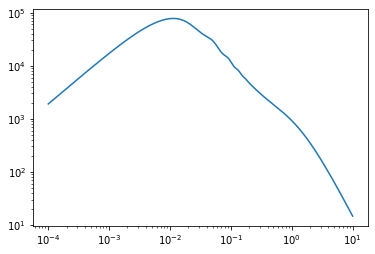

In [38]:
p = pk_func(k, a_arr[0])
plt.loglog(k, p)

In [45]:
z_arr = np.linspace(0,3.5,1000)
nz_arr = np.exp(-((z_arr - 0.25) / 0.05)**2)

k = np.geomspace(1E-4, 1E1, 1000)
a_arr = np.flip(1./1.+z_arr)

P_delta2D = ccl.pk2d.Pk2D(cosmo=cosmo_fid, pkfunc=pk_func, lk_arr=np.log(k), a_arr=a_arr, is_logp=False)

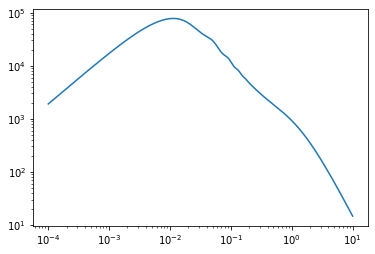

In [41]:
Pk_delt = P_delta2D.eval(k, np.flip(a_arr)[0], cosmo=cosmo_fid)
plt.loglog(k, Pk_delt)

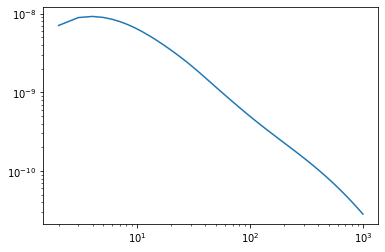

In [47]:
t_M = ccl.WeakLensingTracer(cosmo, (z_arr, nz_arr))
ell = np.unique(np.geomspace(2, 1000, 64).astype(int))

Cl_MM = ccl.angular_cl(cosmo, t_M, t_M, ell, p_of_k_a=P_delta2D)

plt.loglog(ell, Cl_MM)